In [39]:
import pandas as pd

# Load the Iris Flower dataset
iris_data = pd.read_csv("IRIS_ Flower_Dataset.csv")

# Display it
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
#Cheking and detect for missing value
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

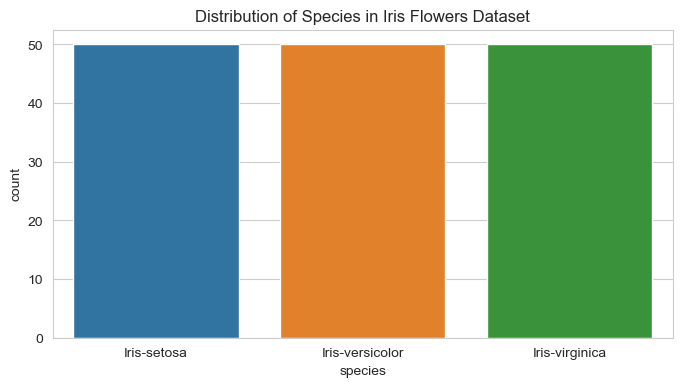

In [42]:
# Visualizing the distribution of the different species
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of the different species
plt.figure(figsize=(8, 4))
sns.countplot(data=iris_data, x='species')
plt.title('Distribution of Species in Iris Flowers Dataset')
plt.show()



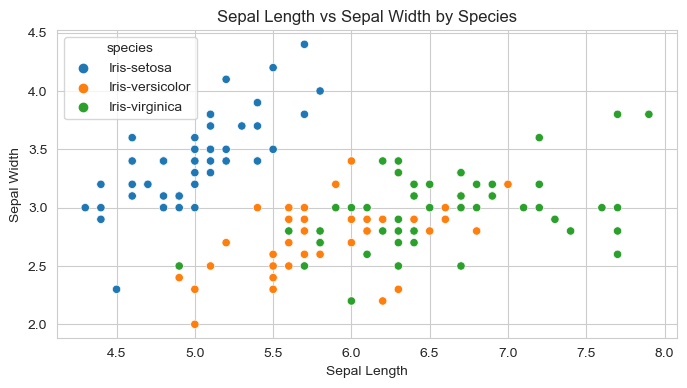

In [43]:
# Create a new figure for plotting with custom dimensions 
plt.figure(figsize=(8, 4))

# Create a scatter plot using seaborn
sns.scatterplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species')

# Set the title 
plt.title('Sepal Length vs Sepal Width by Species')

# Label the x-axis as 'Sepal Length' 
plt.xlabel('Sepal Length')

# Label the y-axis as 'Sepal Width' 
plt.ylabel('Sepal Width')

# Display the plot
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = iris_data.drop('species', axis=1) 
y = iris_data['species']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the SVM model with default parameters
svm_model = SVC(random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = svm_model.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the classification report for the test set
class_report = classification_report(y_test, y_test_pred)

print("train accuracy: {}%     test acuracy:{}% \n {}".format(train_accuracy*100
                                                                        ,test_accuracy*100,class_report))


train accuracy: 98.33333333333333%     test acuracy:96.66666666666667% 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [46]:
# Setting up the grid search for hyperparameter optimization of the SVM classifier
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of hyperplane used to separate the data
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create a GridSearchCV object with the SVM model
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# The best score from GridSearchCV
best_score = grid_search.best_score_

# Predict on the test set with the best hyperparameters
y_test_pred_optimized = grid_search.predict(X_test)

# Calculate accuracy on the test set with the best hyperparameters
test_accuracy_optimized = accuracy_score(y_test, y_test_pred_optimized)


print("test accuracy optimized: {}% \n best parameters:{} best score: {}%".format(test_accuracy_optimized*100,best_params, best_score*100))


test accuracy optimized: 96.66666666666667% 
 best parameters:{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} best score: 98.33333333333334%


In [47]:
import joblib


# Save the model to disk
model_filename = 'final_model_iris.joblib'
joblib.dump(grid_search.best_estimator_, model_filename)

model_filename

'final_model_iris.joblib'

In [48]:
#Save the file
from joblib import load

model_filename = load('final_model_iris.joblib')
